<a href="https://colab.research.google.com/github/Sonika-14/codsoft/blob/main/movie_genre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [ ]:
import nltk
import os

# Set the custom download path for NLTK data
custom_download_path = '/kaggle/working/nltk_data'

# Make sure the directory exists; if not, create it
os.makedirs(custom_download_path, exist_ok=True)

# Append the custom download path to NLTK data path
nltk.data.path.append(custom_download_path)

# Download NLTK resources to the custom path
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/genre/train_data.txt", delimiter=':::' ,header = None ,engine='python')
test_data  = pd.read_csv("/content/drive/MyDrive/genre/test_data.txt", delimiter=':::' ,header = None ,engine='python')

test_data_solution  = pd.read_csv("/content/drive/MyDrive/genre/test_data_solution.txt", delimiter=':::' ,header = None ,engine='python')

In [ ]:
print("shape",train_data.shape)
train_data.head()

shape (54214, 4)


,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
print("shape",test_data_solution.shape)
test_data_solution.head()

shape (54200, 4)


,0,1,2,3
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [ ]:
df = pd.concat((train_data ,test_data_solution))
df.columns = ["id" ,"Title","Genre","Description"]
df.head()

,id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
df.shape

(108414, 4)

In [ ]:
df.duplicated().sum() ## Will give us a number of duplicates

df.drop_duplicates(inplace = True)

In [ ]:
df.isna().sum()  # Will check for any duplicates

df.dropna( inplace = True )

In [ ]:
df.shape

(108414, 4)

In [ ]:
stopword = set(stopwords.words('english'))

def preprocessing(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation using regular expressions
    text = re.sub(r'[^\w\s]', '', text)

    # Remove specific characters #, @, and $
    text = re.sub(r'[#@\$]', '', text)

    # tokenize and convert to list
    tokens = word_tokenize(text)

    ## Lemmatize it
    lemmatizer  = WordNetLemmatizer()

    text = text.split()

    text = [word for word in text if word not in stopword]


    return " ".join(text)

In [ ]:
df["Despcription_clean"] =  df["Description"].apply(preprocessing)

In [ ]:
df.head()

,id,Title,Genre,Description,Despcription_clean
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...


In [ ]:
df["Genre"].value_counts()

 drama           27225
 documentary     26192
 comedy          14893
 short           10145
 horror           4408
 thriller         3181
 action           2629
 western          2064
 reality-tv       1767
 family           1567
 adventure        1550
 music            1462
 romance          1344
 sci-fi           1293
 adult            1180
 crime            1010
 animation         996
 sport             863
 talk-show         782
 fantasy           645
 mystery           637
 musical           553
 biography         529
 history           486
 game-show         387
 news              362
 war               264
Name: Genre, dtype: int64

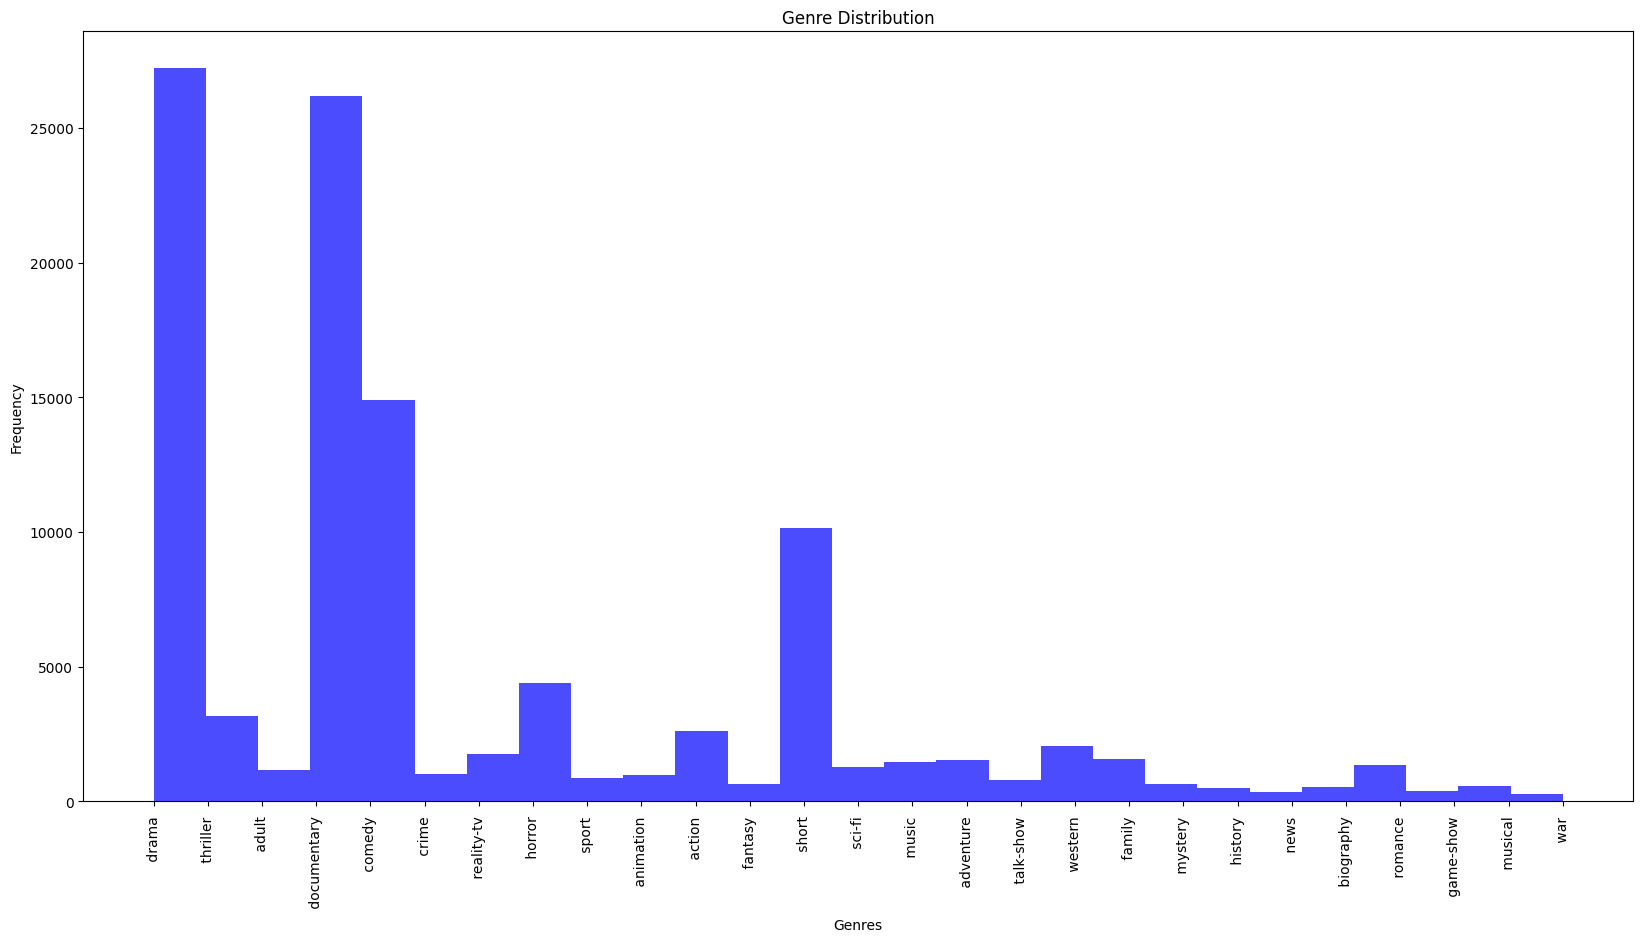

In [ ]:
plt.figure(figsize=(20, 10))
plt.hist(df["Genre"],bins =27 , color='blue', alpha=0.7)
plt.title("Genre Distribution")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

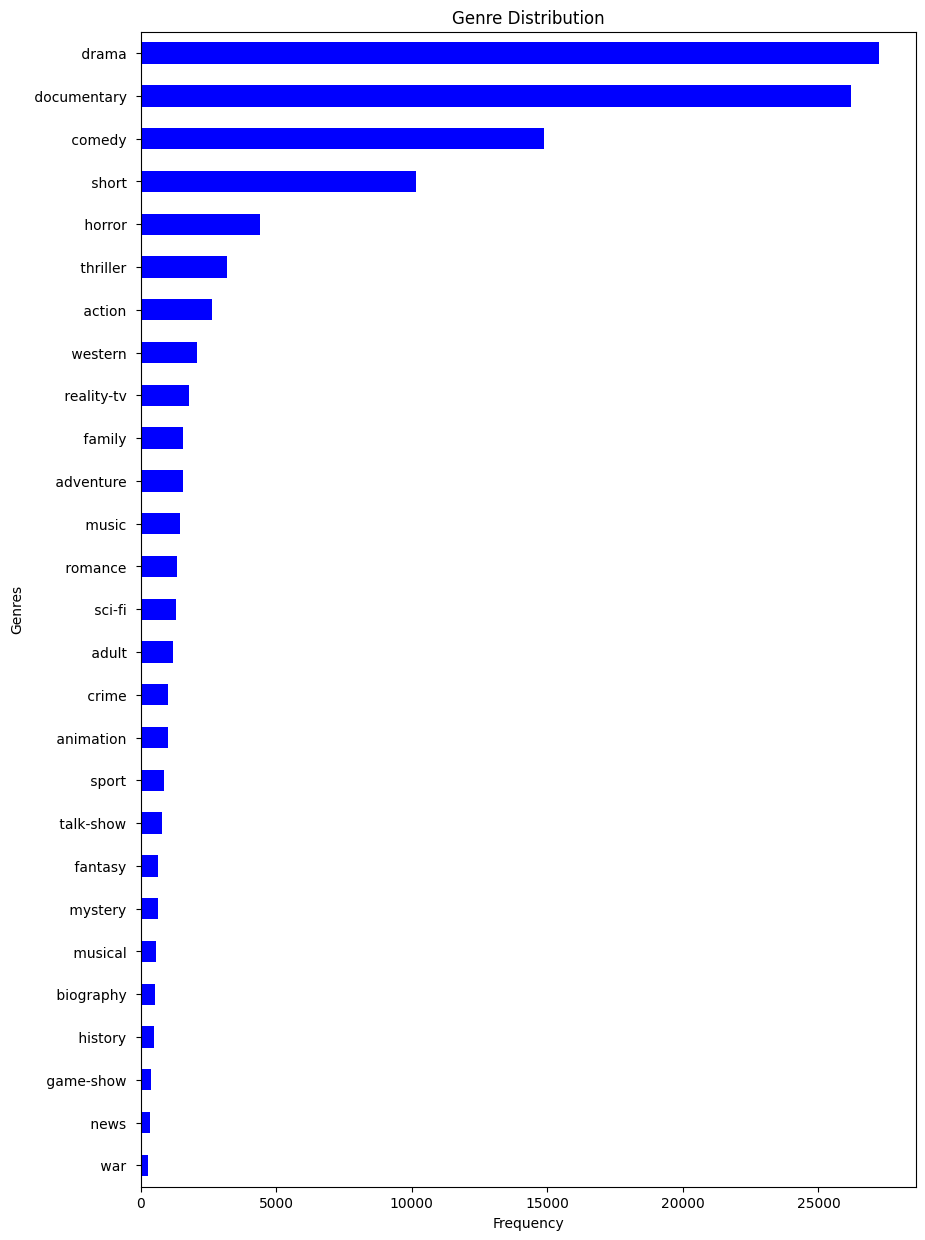

In [ ]:
genre_counts = df["Genre"].value_counts()
sorted_genres = genre_counts.sort_values(ascending=True)
# Create a horizontal histogram of genre distribution
plt.figure(figsize=(10, 15))
sorted_genres.plot(kind='barh',color = "blue", alpha=1 )
plt.title("Genre Distribution")
plt.xlabel("Frequency")
plt.ylabel("Genres")
plt.show()

In [ ]:
data = df.drop(["Title","id"] , axis = 1) # will drop column
data.head()

,Genre,Description,Despcription_clean
0,drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...
1,thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Genre_encoded'] = label_encoder.fit_transform(data['Genre'])
data['Genre_encoded']

class_names= list(label_encoder.classes_)
class_names

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

In [ ]:
data.head()

,Genre,Description,Despcription_clean,Genre_encoded
0,drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...,8
1,thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...,24
2,adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...,1
3,drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...,8
4,drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...,8


In [ ]:
x = data["Despcription_clean"]
y = data["Genre"]

x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.5)


In [ ]:
vectorize = CountVectorizer()
x_train1 = vectorize.fit_transform(x_train)
x_test1 =  vectorize.transform(x_test)

Model Score on Training data 0.63866290331507
Model Score on Training data 0.5240282620325788


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.04      0.69      0.07        75
       adult        0.02      0.54      0.05        26
   adventure        0.06      0.66      0.10        67
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         3
      comedy        0.45      0.52      0.48      6408
       crime        0.00      0.00      0.00         0
 documentary        0.90      0.57      0.70     20805
       drama        0.82      0.46      0.59     24325
      family        0.00      0.20      0.00         5
     fantasy        0.00      0.00      0.00        13
   game-show        0.13      1.00      0.24        28
     history        0.00      0.00      0.00         0
      horror        0.27      0.74      0.40       796
       music        0.06      0.91      0.11        47
     musical        0.01      1.00      0.02         3
     mystery        0.00      0.00      0.00         0
        n

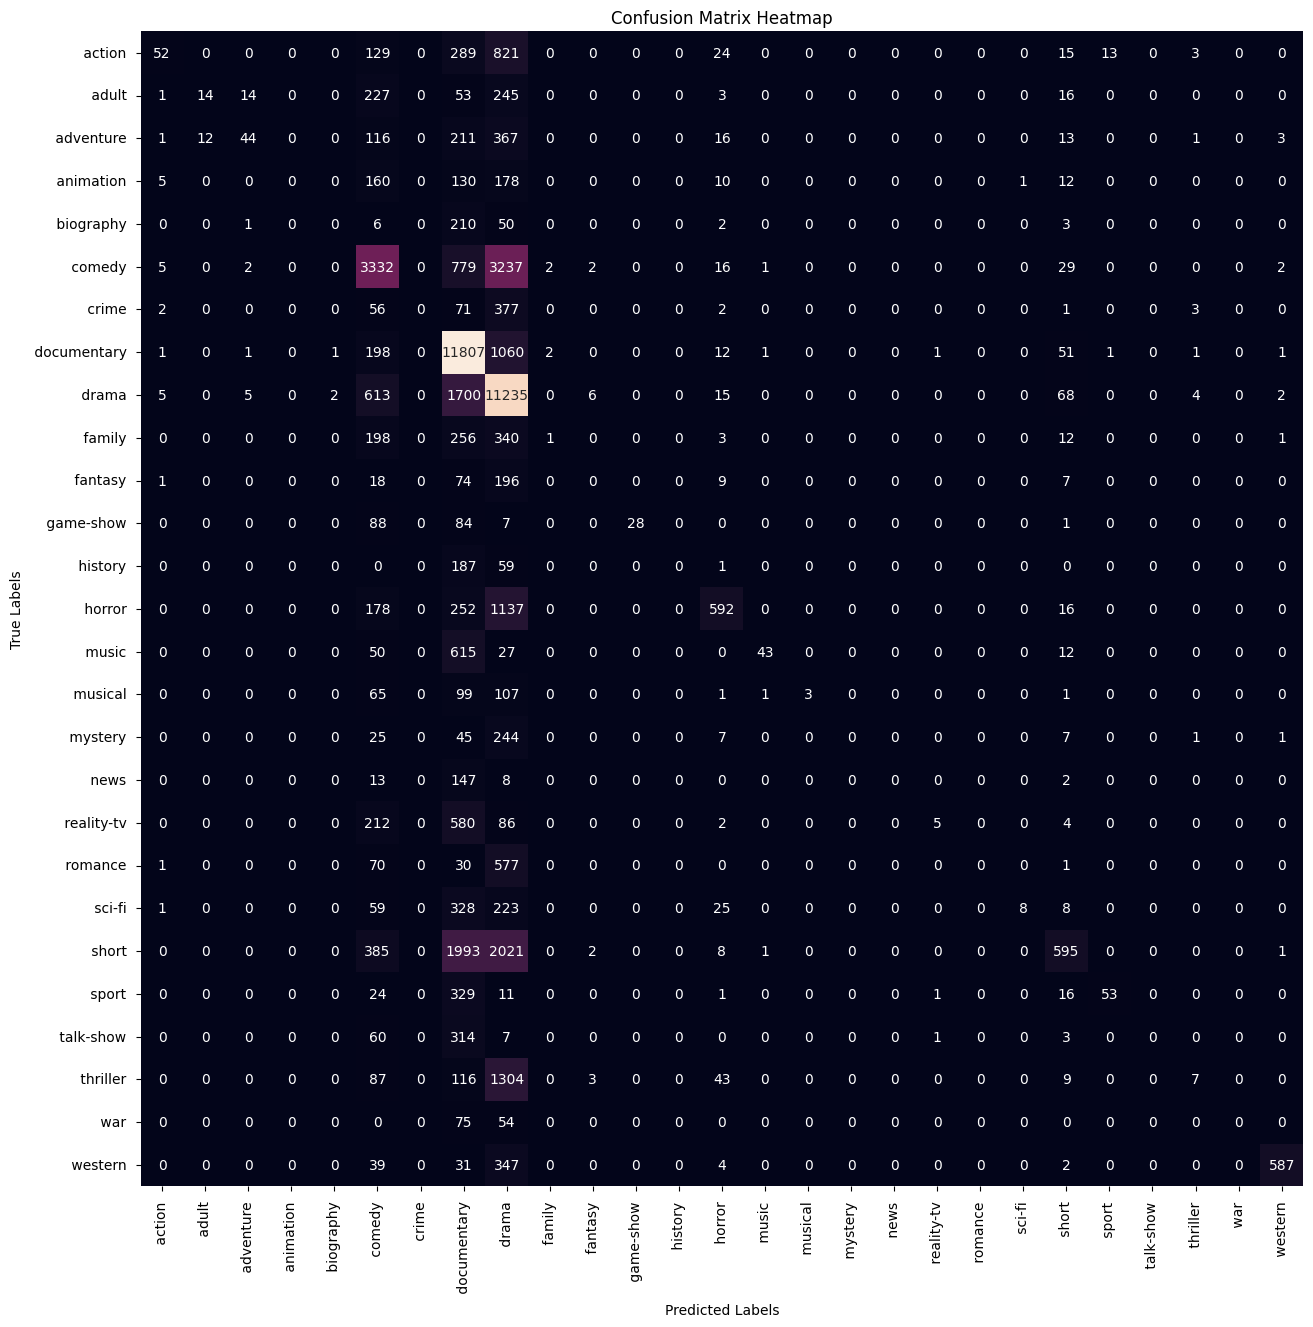

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train1 ,y_train)
print("Model Score on Training data",mnb.score(x_train1 ,y_train))
print("Model Score on Training data",mnb.score(x_test1 ,y_test))
y_pred = mnb.predict(x_test1)

print(classification_report(y_pred ,y_test))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
model = LogisticRegression()
model.fit(x_train1 ,y_train)
print("Model Score on Training data",model.score(x_train1 ,y_train))
print("Model Score on Training data",model.score(x_test1 ,y_test))
y_pred = model.predict(x_test1)
print(classification_report(y_pred ,y_test))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Score on Training data 0.9961444093936207
Model Score on Training data 0.5680816130758021
               precision    recall  f1-score   support

      action        0.30      0.41      0.35       986
       adult        0.38      0.64      0.48       339
   adventure        0.26      0.45      0.32       448
   animation        0.17      0.37      0.24       234
   biography        0.01      0.10      0.02        29
      comedy        0.58      0.53      0.55      8165
       crime        0.09      0.22      0.13       202
 documentary        0.78      0.70      0.74     14629
       drama        0.68      0.57      0.62     16451
      family        0.17      0.33      0.23       421
     fantasy        0.08      0.23      0.12       104
   game-show        0.56      0.87      0.68       134
     history        0.02      0.18      0.04        28
      horror        0.58      0.62      0.60      2051
       music        0.52      0.63      0.57       617
     musical        0.1

In [ ]:
svm = LinearSVC()
svm.fit(x_train1 ,y_train)
print("Model Score on Training data",svm.score(x_train1 ,y_train))
print("Model Score on Training data",svm.score(x_test1 ,y_test))
y_pred = svm.predict(x_test1)
print(classification_report(y_pred ,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Score on Training data 0.9995203571494456
Model Score on Training data 0.5186783994687033
               precision    recall  f1-score   support

      action        0.30      0.35      0.32      1129
       adult        0.39      0.46      0.42       479
   adventure        0.24      0.31      0.27       601
   animation        0.15      0.26      0.19       281
   biography        0.03      0.05      0.03       135
      comedy        0.52      0.49      0.50      7889
       crime        0.10      0.15      0.12       321
 documentary        0.73      0.69      0.71     13813
       drama        0.60      0.54      0.57     15060
      family        0.16      0.23      0.19       559
     fantasy        0.09      0.13      0.10       205
   game-show        0.56      0.76      0.65       154
     history        0.03      0.08      0.05        95
      horror        0.56      0.54      0.55      2228
       music        0.50      0.56      0.53       672
     musical        0.0

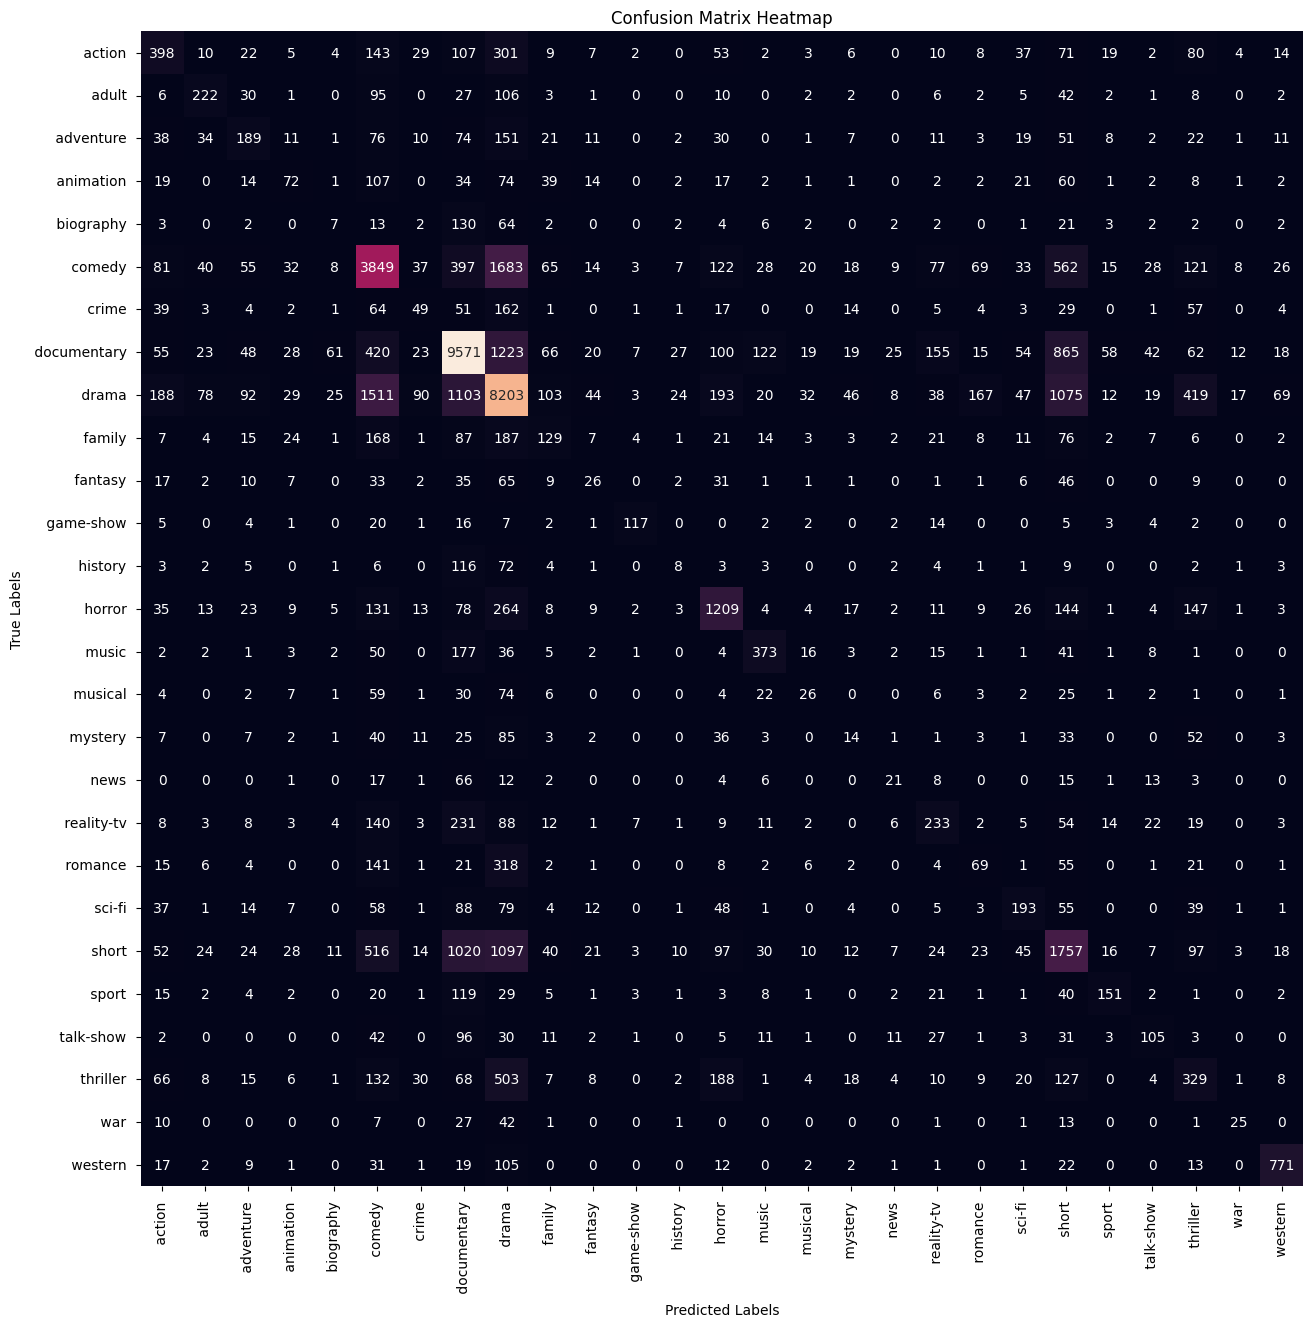

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

Random Forest - Train Score: 0.9995203571494456
Random Forest - Test Score: 0.491062039957939


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.01      0.71      0.02        17
       adult        0.08      0.66      0.14        68
   adventure        0.08      0.90      0.15        72
   animation        0.00      0.33      0.01         6
   biography        0.00      0.00      0.00         0
      comedy        0.26      0.54      0.35      3562
       crime        0.00      0.67      0.01         3
 documentary        0.88      0.56      0.68     20766
       drama        0.86      0.41      0.56     28154
      family        0.02      0.76      0.04        21
     fantasy        0.00      0.00      0.00         0
   game-show        0.42      0.98      0.59        89
     history        0.00      0.00      0.00         2
      horror        0.11      0.77      0.19       299
       music        0.10      0.87      0.18        84
     musical        0.02      0.71      0.04         7
     mystery        0.00      1.00      0.01         1
        n

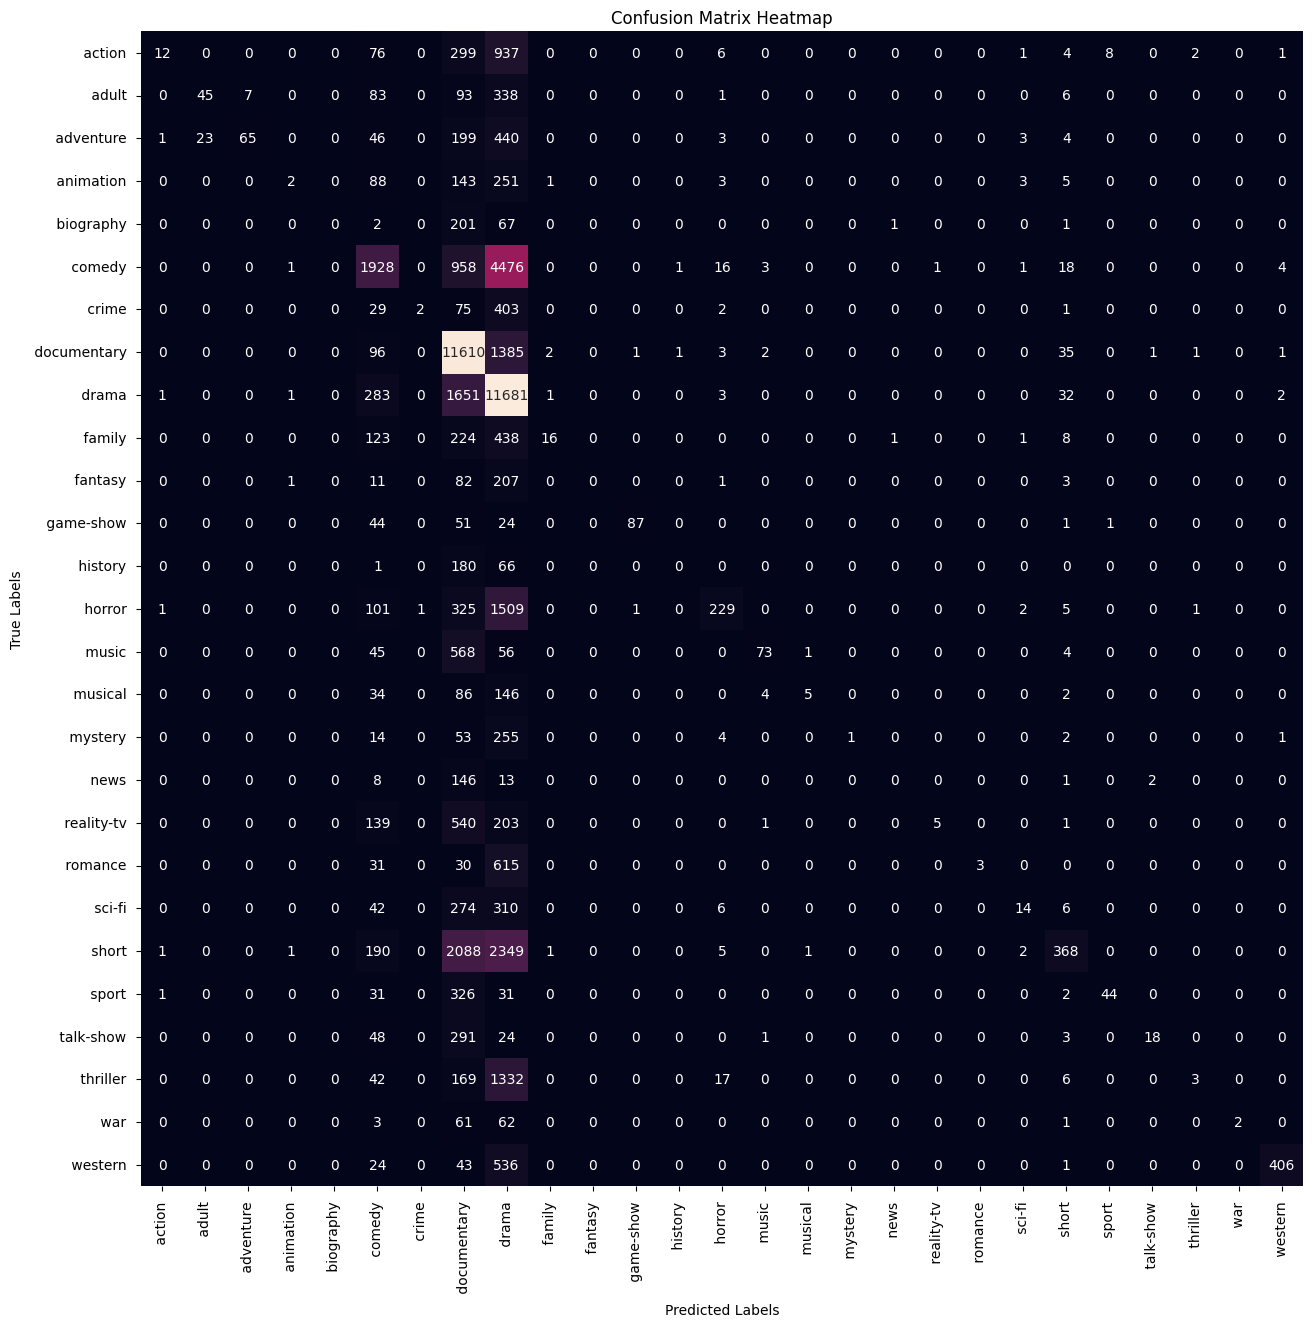

In [ ]:
random_forest = RandomForestClassifier()

# Fit the model with GridSearchCV
random_forest.fit(x_train1, y_train)
print("Random Forest - Train Score:",random_forest.score(x_train1, y_train))
print("Random Forest - Test Score:", random_forest.score(x_test1, y_test))

y_pred = random_forest.predict(x_test1)
print(classification_report(y_pred ,y_test))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
vectorizer = TfidfVectorizer()
x_train2 = vectorize.fit_transform(x_train)
x_test2 =  vectorize.transform(x_test)

Model Score on Training data 0.63866290331507
Model Score on Training data 0.5240282620325788


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.04      0.69      0.07        75
       adult        0.02      0.54      0.05        26
   adventure        0.06      0.66      0.10        67
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         3
      comedy        0.45      0.52      0.48      6408
       crime        0.00      0.00      0.00         0
 documentary        0.90      0.57      0.70     20805
       drama        0.82      0.46      0.59     24325
      family        0.00      0.20      0.00         5
     fantasy        0.00      0.00      0.00        13
   game-show        0.13      1.00      0.24        28
     history        0.00      0.00      0.00         0
      horror        0.27      0.74      0.40       796
       music        0.06      0.91      0.11        47
     musical        0.01      1.00      0.02         3
     mystery        0.00      0.00      0.00         0
        n

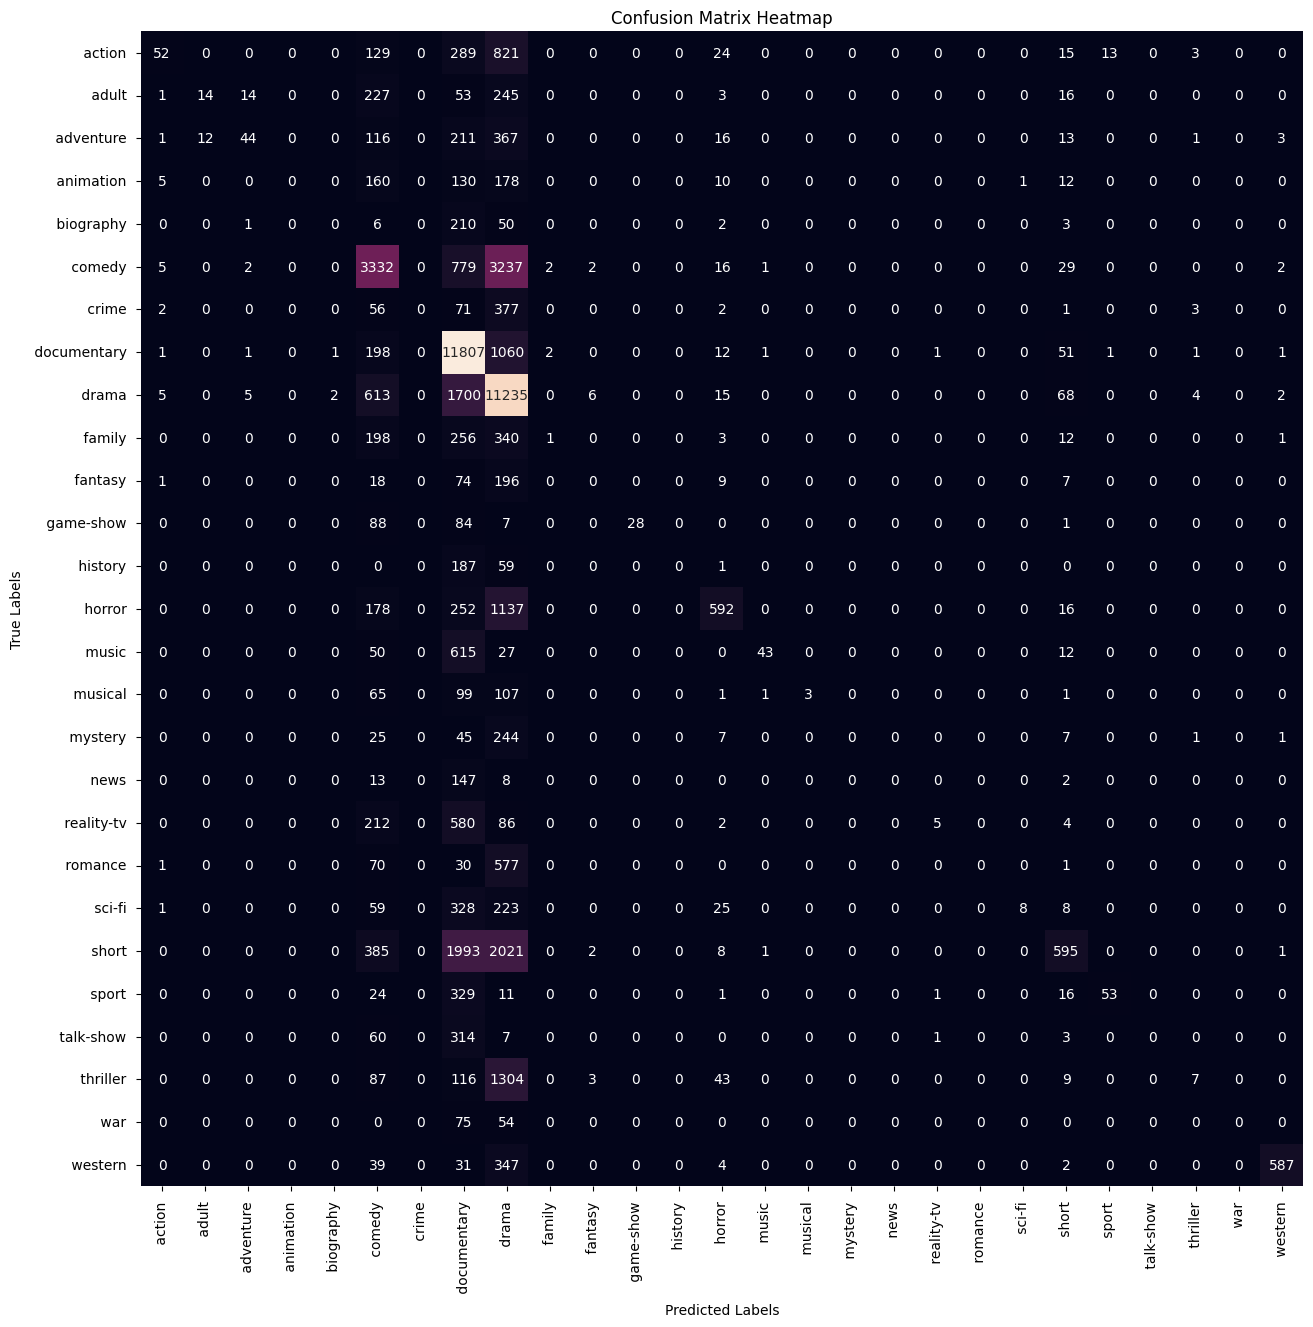

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train2 ,y_train)
print("Model Score on Training data",mnb.score(x_train2 ,y_train))
print("Model Score on Training data",mnb.score(x_test2 ,y_test))
y_pred = mnb.predict(x_test2)
print(classification_report(y_pred ,y_test))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

Model Score on Training data 0.63866290331507
Model Score on Training data 0.5240282620325788


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.04      0.69      0.07        75
       adult        0.02      0.54      0.05        26
   adventure        0.06      0.66      0.10        67
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         3
      comedy        0.45      0.52      0.48      6408
       crime        0.00      0.00      0.00         0
 documentary        0.90      0.57      0.70     20805
       drama        0.82      0.46      0.59     24325
      family        0.00      0.20      0.00         5
     fantasy        0.00      0.00      0.00        13
   game-show        0.13      1.00      0.24        28
     history        0.00      0.00      0.00         0
      horror        0.27      0.74      0.40       796
       music        0.06      0.91      0.11        47
     musical        0.01      1.00      0.02         3
     mystery        0.00      0.00      0.00         0
        n

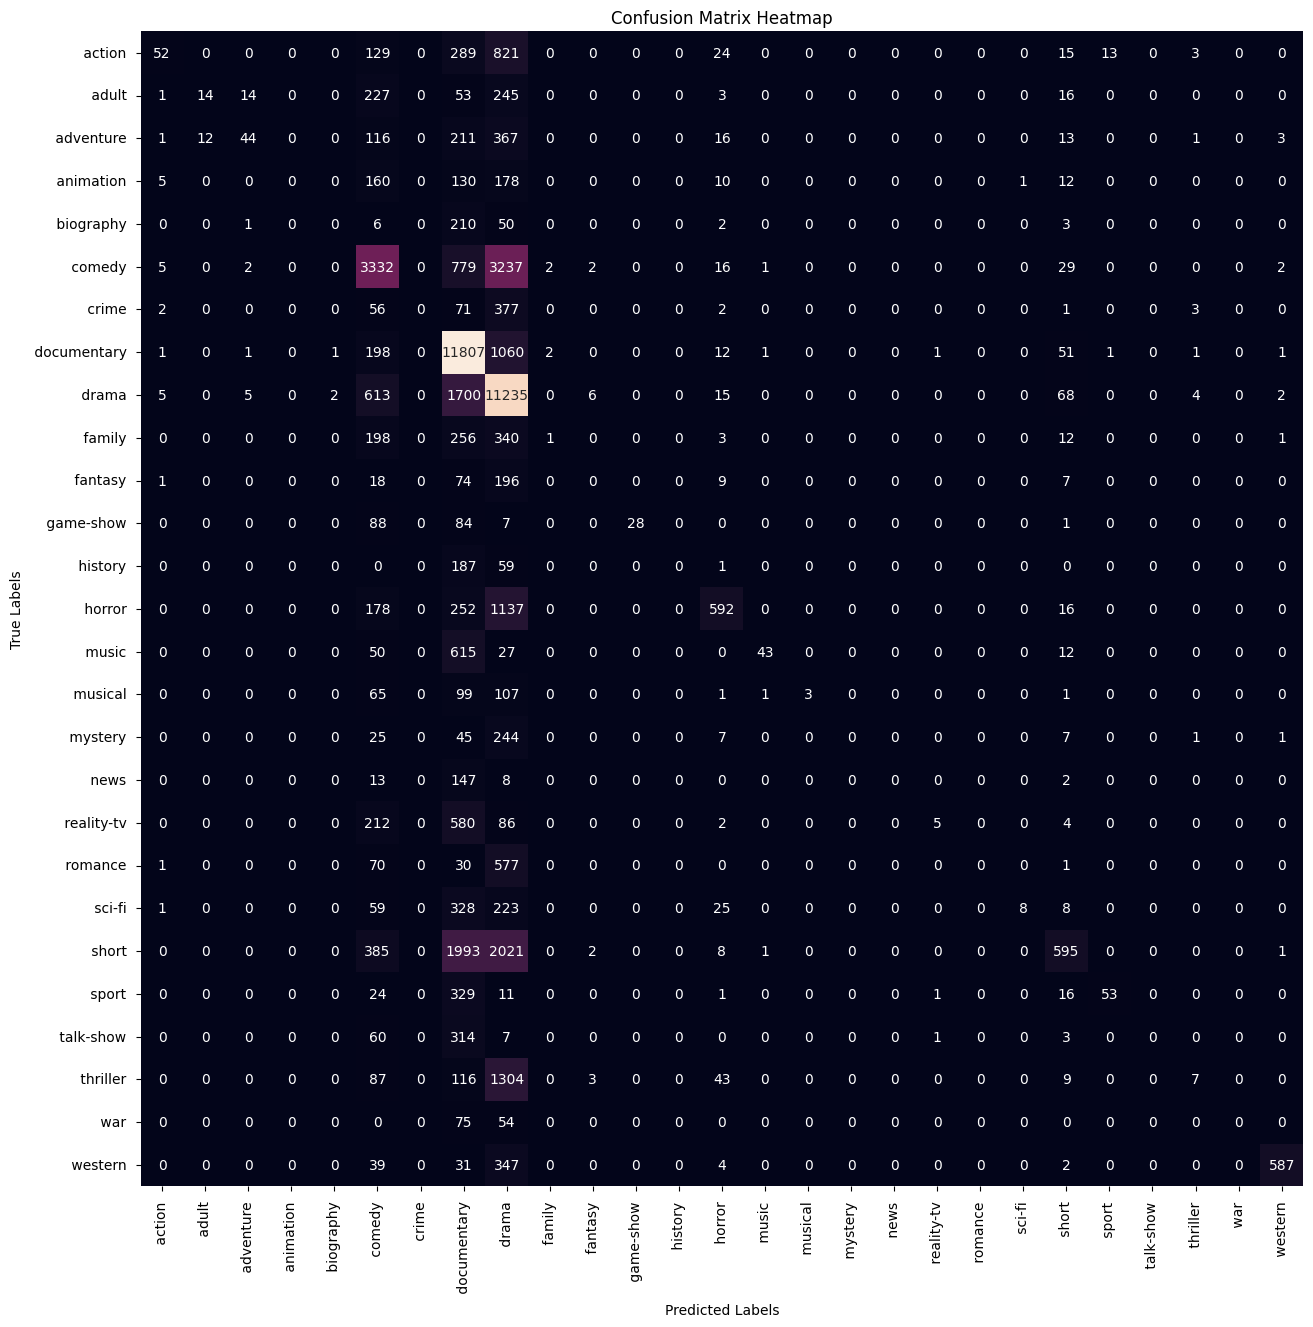

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train2 ,y_train)
print("Model Score on Training data",mnb.score(x_train2 ,y_train))
print("Model Score on Training data",mnb.score(x_test2 ,y_test))
y_pred = mnb.predict(x_test2)
print(classification_report(y_pred ,y_test))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Score on Training data 0.9961444093936207
Model Score on Training data 0.5680816130758021
               precision    recall  f1-score   support

      action        0.30      0.41      0.35       986
       adult        0.38      0.64      0.48       339
   adventure        0.26      0.45      0.32       448
   animation        0.17      0.37      0.24       234
   biography        0.01      0.10      0.02        29
      comedy        0.58      0.53      0.55      8165
       crime        0.09      0.22      0.13       202
 documentary        0.78      0.70      0.74     14629
       drama        0.68      0.57      0.62     16451
      family        0.17      0.33      0.23       421
     fantasy        0.08      0.23      0.12       104
   game-show        0.56      0.87      0.68       134
     history        0.02      0.18      0.04        28
      horror        0.58      0.62      0.60      2051
       music        0.52      0.63      0.57       617
     musical        0.1

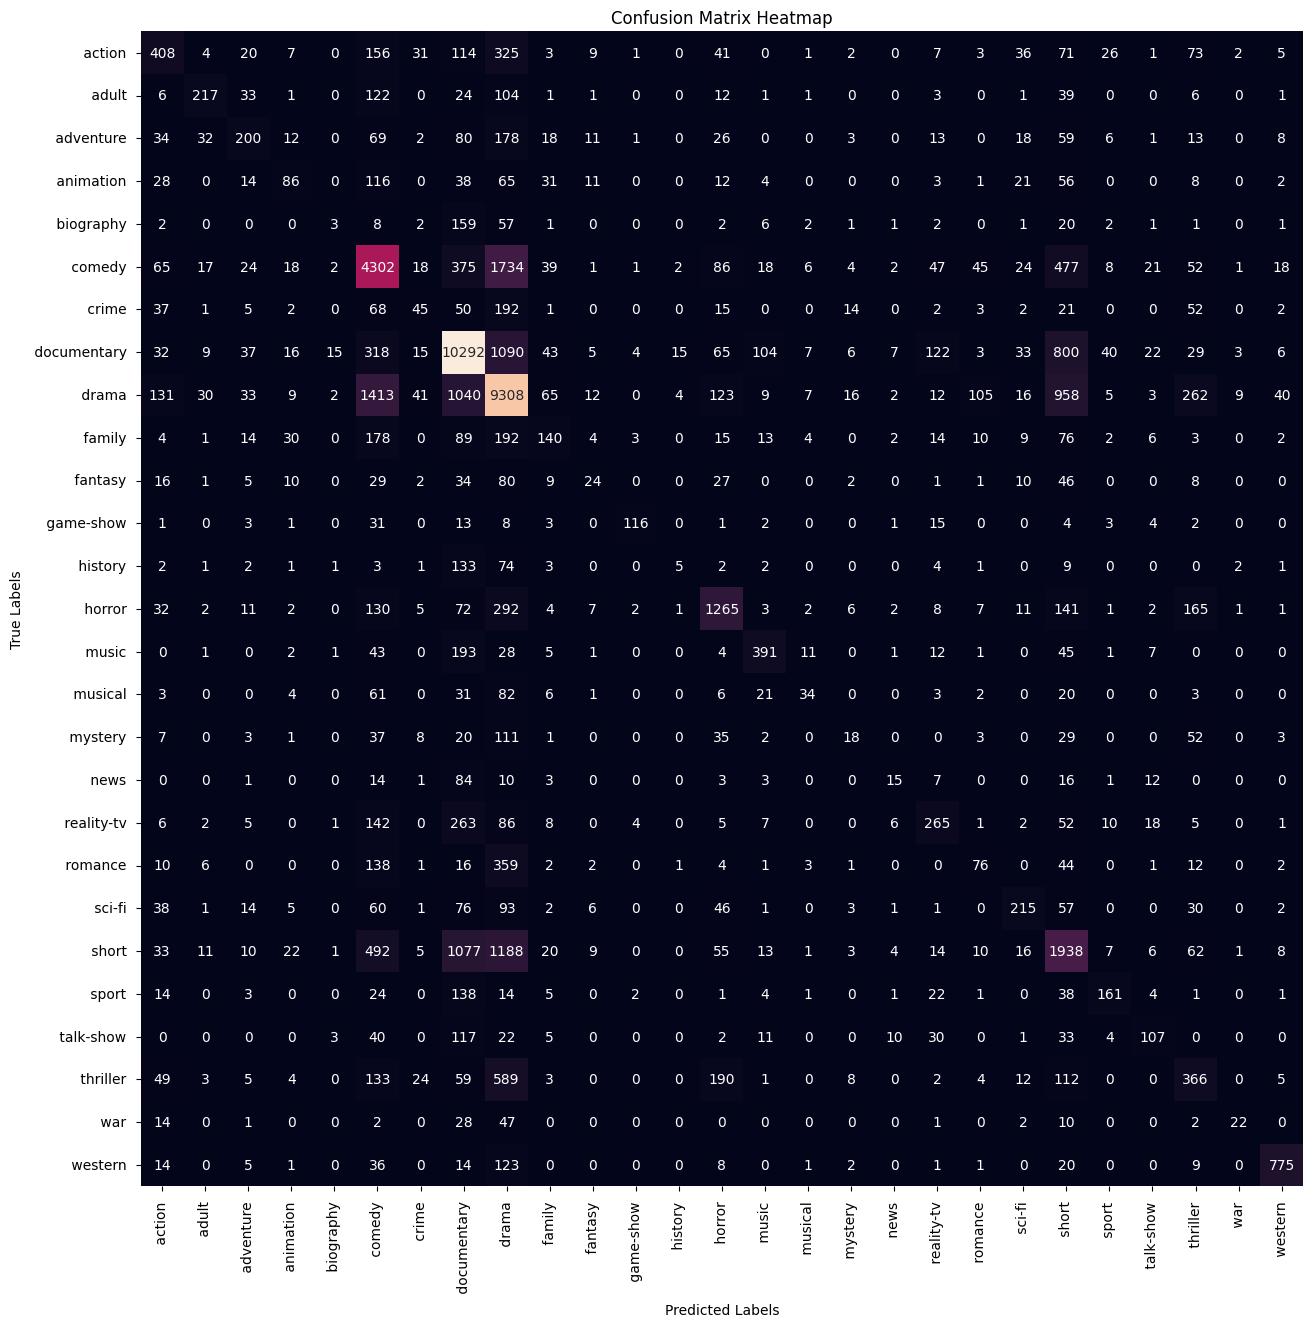

In [ ]:
model = LogisticRegression()
model.fit(x_train2 ,y_train)
print("Model Score on Training data",model.score(x_train2 ,y_train))
print("Model Score on Training data",model.score(x_test2 ,y_test))
y_pred = model.predict(x_test2)
print(classification_report(y_pred ,y_test))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Score on Training data 0.9995203571494456
Model Score on Training data 0.5186415038648146
               precision    recall  f1-score   support

      action        0.29      0.35      0.32      1127
       adult        0.39      0.46      0.42       479
   adventure        0.24      0.31      0.27       601
   animation        0.15      0.26      0.19       281
   biography        0.03      0.05      0.03       134
      comedy        0.52      0.49      0.50      7887
       crime        0.10      0.15      0.12       321
 documentary        0.73      0.69      0.71     13812
       drama        0.60      0.54      0.57     15064
      family        0.16      0.23      0.19       559
     fantasy        0.09      0.13      0.10       205
   game-show        0.56      0.76      0.65       154
     history        0.03      0.08      0.05        95
      horror        0.56      0.54      0.55      2229
       music        0.50      0.56      0.53       671
     musical        0.0

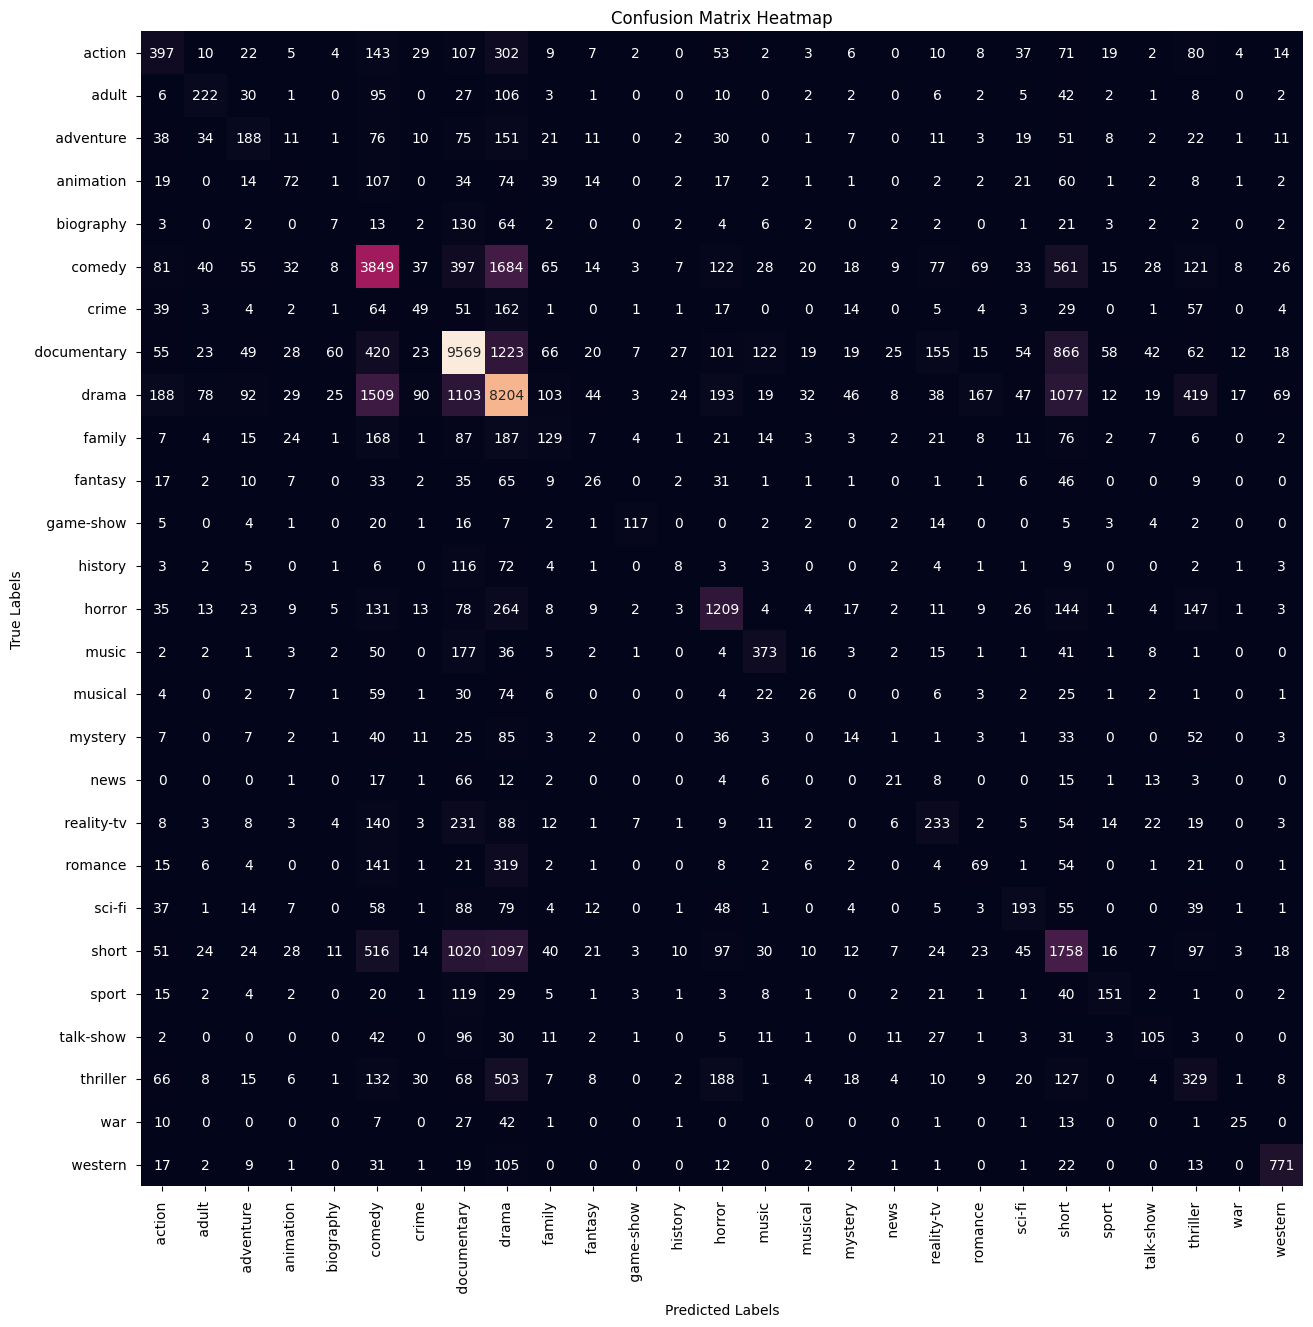

In [ ]:
svm = LinearSVC()
svm.fit(x_train2 ,y_train)
print("Model Score on Training data",svm.score(x_train2 ,y_train))
print("Model Score on Training data",svm.score(x_test2 ,y_test))
y_pred = svm.predict(x_test2)
print(classification_report(y_pred ,y_test))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

Random Forest - Train Score: 0.9995203571494456
Random Forest - Test Score: 0.49144944379877137


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.01      0.85      0.02        13
       adult        0.08      0.70      0.14        64
   adventure        0.11      0.83      0.19       101
   animation        0.01      0.33      0.01         9
   biography        0.00      0.00      0.00         0
      comedy        0.26      0.57      0.36      3470
       crime        0.01      1.00      0.01         3
 documentary        0.89      0.56      0.68     20947
       drama        0.85      0.41      0.56     28014
      family        0.02      0.74      0.03        19
     fantasy        0.00      0.00      0.00         0
   game-show        0.43      0.97      0.60        93
     history        0.00      0.33      0.01         3
      horror        0.12      0.70      0.20       363
       music        0.09      0.87      0.16        75
     musical        0.02      0.83      0.04         6
     mystery        0.00      1.00      0.01         1
        n

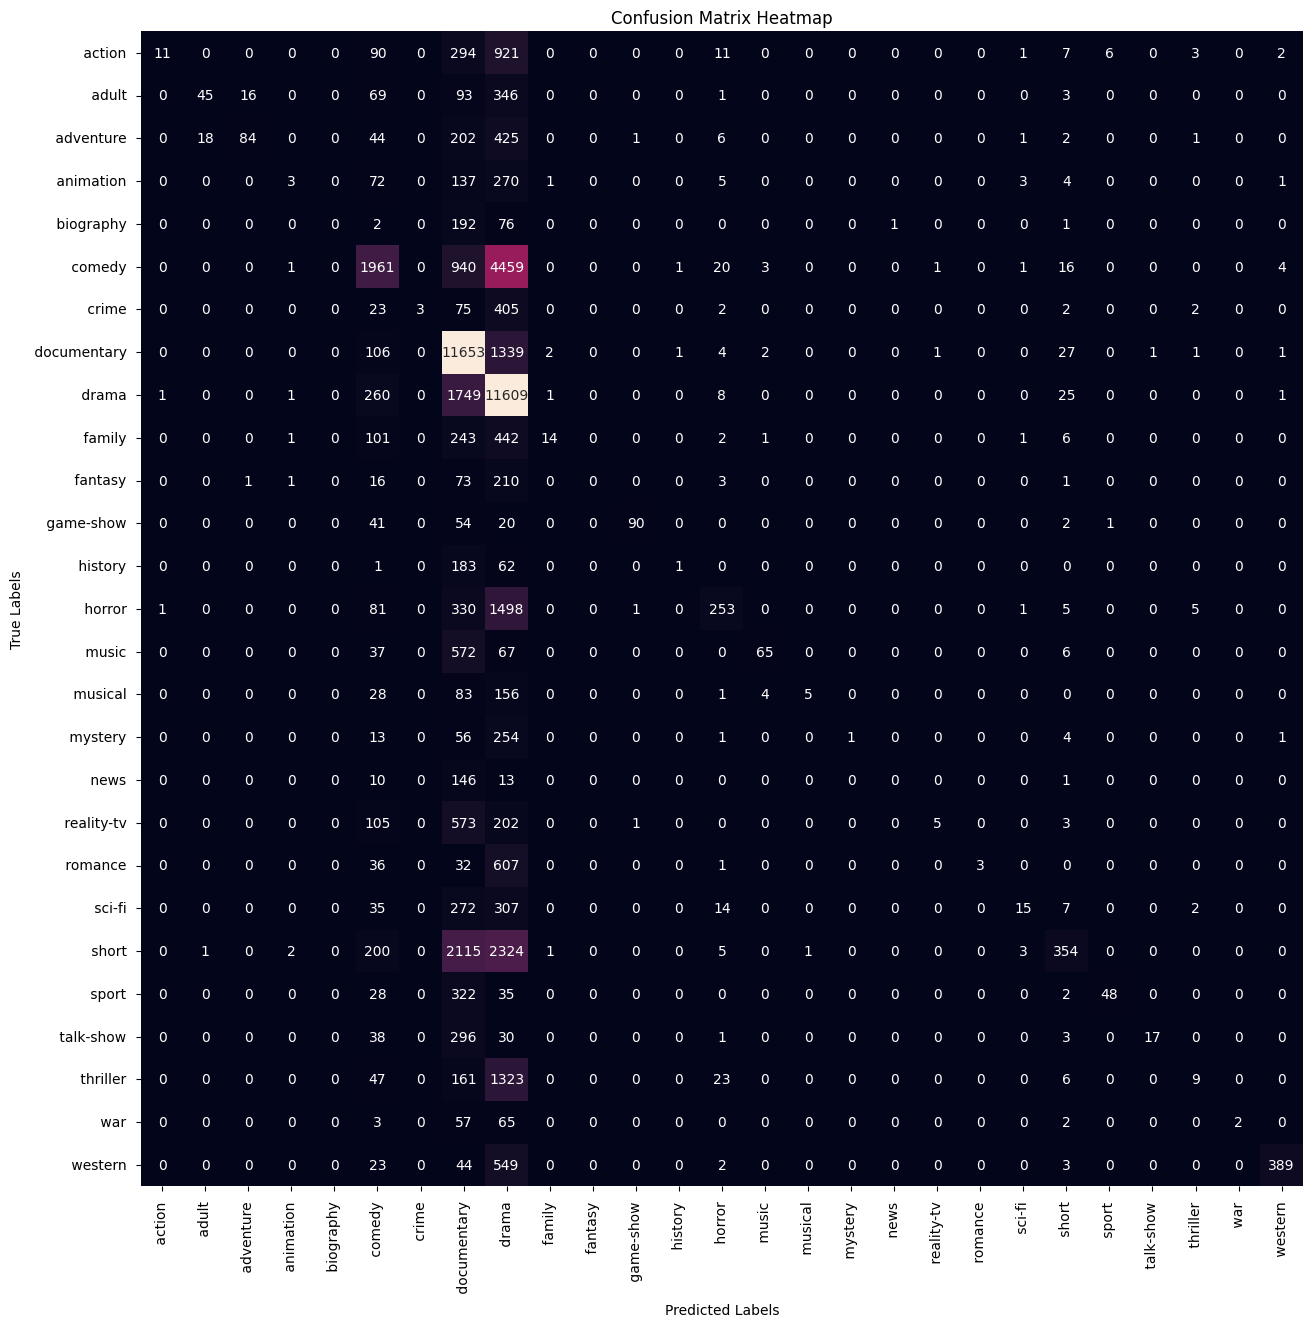

In [ ]:
random_forest = RandomForestClassifier()


# Fit the model with GridSearchCV
random_forest.fit(x_train2, y_train)


print("Random Forest - Train Score:",random_forest.score(x_train2, y_train))
print("Random Forest - Test Score:", random_forest.score(x_test2, y_test))

y_pred = random_forest.predict(x_test2)
print(classification_report(y_pred ,y_test))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()